<a href="https://colab.research.google.com/github/jiyoung-99/boiler-plate-node/blob/master/n114a_data_visualization_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 4*

# 📝 Assignment





## 1. 아래 링크를 참조하여 차트를 그리세요 ( matplotlib 사용 )

<https://github.com/mwaskom/seaborn-data>

- 차트는 총 4가지 이상을 그려야 합니다.

- 데이터로 부터 예상되는 인사이트를, 시각화를 통해서 확인하거나, 실제로는 어떤지에 대해서 서술하는 리포트를 만드세요.

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np



In [5]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

In [7]:
diamonds_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
diamonds_df = diamonds_df.fillna(0)
diamonds_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


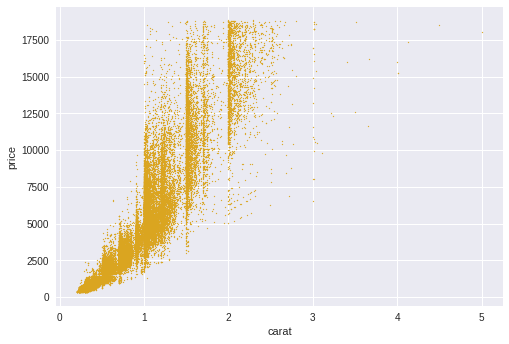

In [8]:
#1-1 carat 에 따른 price 점 그래프
# carat 이 크면 price 가 클 것이다 예측
plt.style.use('seaborn')
diamonds_df.plot(kind='scatter', x='carat', y='price', c='goldenrod', s=1)
# ################실제로 carat 과 price가 정비례함######################

In [ ]:
# color 상태와 캐롯, 가격의 상관관계를 구하기


In [9]:
diamonds_df.info()
# 여기서 가격은 int 형 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
# color 태와 가격의 평균 치를 구한다.
diamonds_df_groupby_color = diamonds_df.groupby('color').mean()
diamonds_df_groupby_color

,carat,depth,table,price,x,y,z
color,,,,,,,
D,0.657795,61.698125,57.404590,3169.954096,5.417051,5.421128,3.342827
E,0.657867,61.662090,57.491201,3076.752475,5.411580,5.419029,3.340689
F,0.736538,61.694582,57.433536,3724.886397,5.614961,5.619456,3.464446
G,0.771190,61.757111,57.288629,3999.135671,5.677543,5.680192,3.505021
H,0.911799,61.836850,57.517811,4486.669196,5.983335,5.984815,3.695965
I,1.026927,61.846385,57.577278,5091.874954,6.222826,6.222730,3.845411
J,1.162137,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251


          carat      depth      table  ...         x         y         z
color                                  ...                              
D      0.657795  61.698125  57.404590  ...  5.417051  5.421128  3.342827
E      0.657867  61.662090  57.491201  ...  5.411580  5.419029  3.340689
F      0.736538  61.694582  57.433536  ...  5.614961  5.619456  3.464446
G      0.771190  61.757111  57.288629  ...  5.677543  5.680192  3.505021
H      0.911799  61.836850  57.517811  ...  5.983335  5.984815  3.695965
I      1.026927  61.846385  57.577278  ...  6.222826  6.222730  3.845411
J      1.162137  61.887215  57.812393  ...  6.519338  6.518105  4.033251

[7 rows x 7 columns]


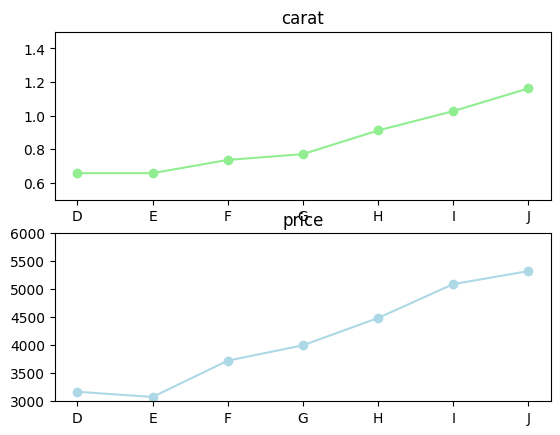

In [11]:
#carat 과 price 만 빼준다.
diamonds_df_carat = diamonds_df_groupby_color['carat']
diamonds_df_price = diamonds_df_groupby_color['price']
print(diamonds_df_groupby_color.head(7))
plt.style.use('default')
# 그래프 2개 그려서 각각 carat, price 상관관계 보기

# 그래프 객체를 생성해준다.
fig = plt.figure()

# 2개 만들거라고 선언
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# 범위를 지정해준다.
ax1.set_ylim(0.5, 1.5)
ax2.set_ylim(3000, 6000)

ax1.set_title('carat')
ax2.set_title('price')
ax1.plot(diamonds_df_carat.index, diamonds_df_carat.values , marker='o', color='lightgreen')
ax2.plot(diamonds_df_price.index, diamonds_df_price.values , marker='o', color='lightblue')

plt.show()

############### 1-2 색상이 D-E-F-G-H-I-J   순으로 carat, price 가 상승함


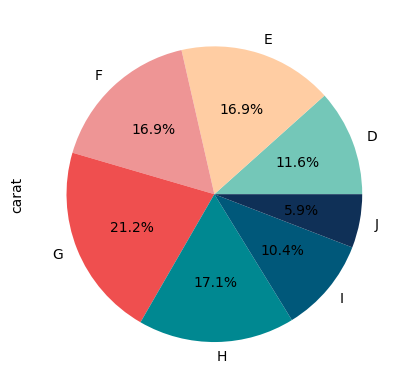

In [12]:
# 1-3 Premium 값을 갖는 다이아몬드 중 color의 분포도는? 원형으로 확인

diamonds_df_cut = diamonds_df[(diamonds_df['cut'] == 'Premium')]
diamonds_df_cut = diamonds_df_cut.groupby('color')
diamonds_df_cut.count()
# carat은 임의로 해준거고 카운트의 숫자를 담고 있는 변수로 바뀐것임
diamonds_df_cut.count()['carat'].plot(kind='pie', autopct='%1.1f%%', colors=['#74c7b8', '#ffcda3', '#ee9595', '#ef4f4f', '#008891', '#00587a', '#0f3057'])

########Premium 값을 갖는 다이아몬드 중에서 G 색상이 가장 많다.

In [13]:
# 5만여개의 다이아몬드 중 가격에 따른 갯수 분포
df_price = pd.DataFrame(diamonds_df['price'])

df_price.shape
df_price['count'] = 1

# df_price_group = df_price.groupby('price')
# df_price_group.count()


In [14]:
df_price_group = df_price.groupby('price')
df_price_group.count()

,count
price,
326,2
327,1
334,1
335,1
336,2
...,...
18803,1
18804,1
18806,1


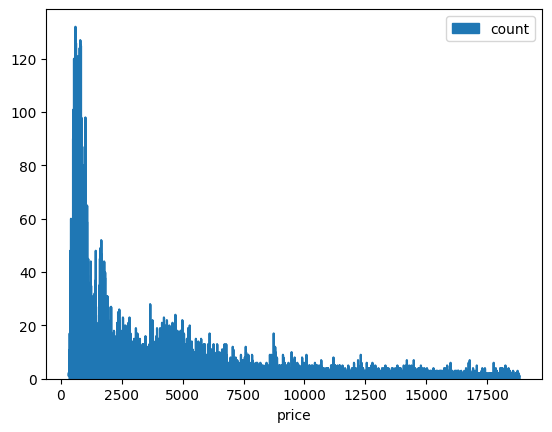

In [15]:
## 1-4 가격대별 상품 갯수 그래프
df_price_group.count().plot(kind='area')

## ######################  결론 : 싼 가격의 다이아몬드가 많고 비싼 가격의 다이어몬드 갯수가 적다.

## 2. seaborn을 사용하여 차트를 그리세요. 

- annotation, facet을 포함해야합니다.

- 기본 색상이 아닌 다른 palette를 사용해야 합니다.


In [16]:

import seaborn as sns
import pandas as pd
import numpy as np

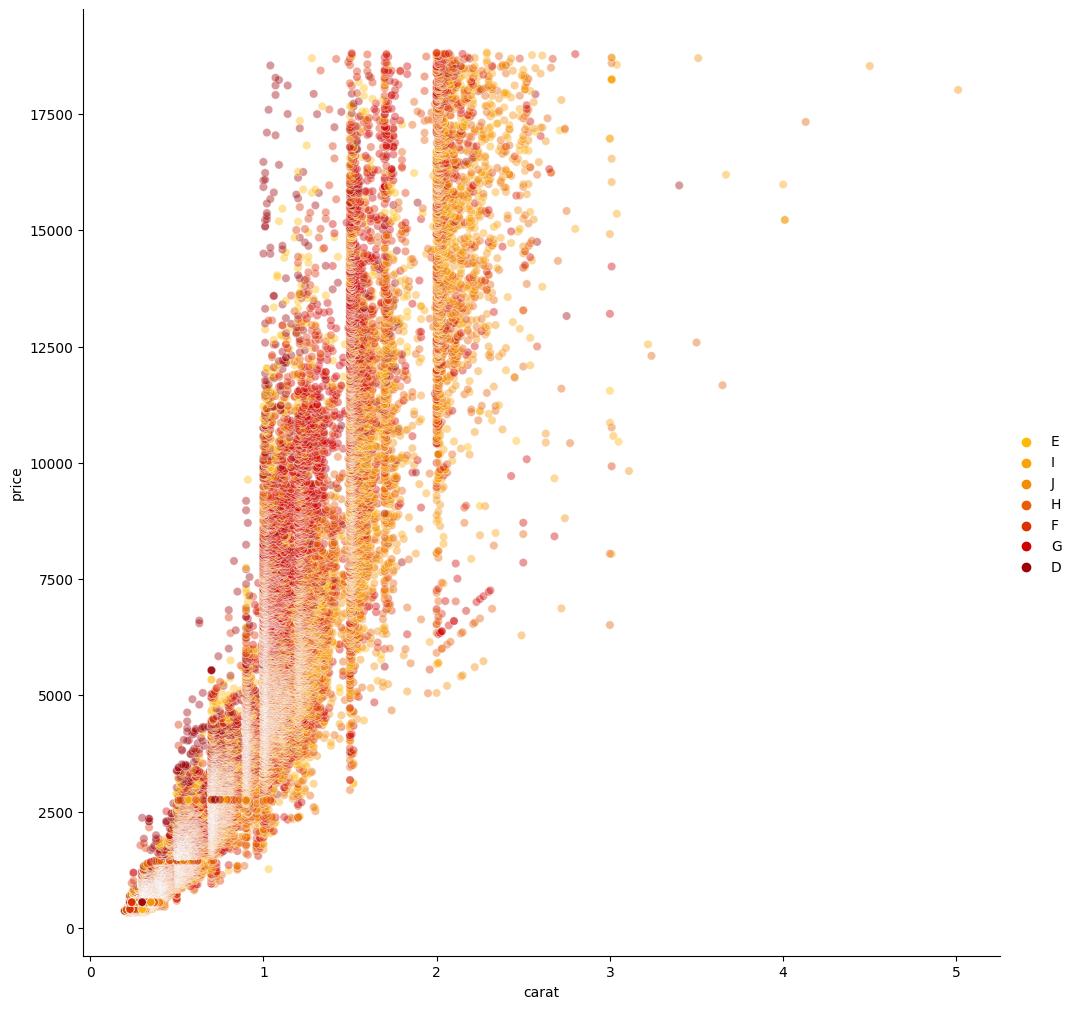

In [17]:
g = sns.FacetGrid(data = diamonds_df, height=10, aspect=1)

g.map_dataframe(
    sns.scatterplot,
    x = 'carat',
    y = 'price',
    hue = 'color',
    alpha = 0.4,
    palette={
        'E':'#ffba08', 
        'I':'#faa307', 
        'J':'#f48c06', 
        'H':'#e85d04', 
        'F':'#dc2f02', 
        'G':'#d00000', 
        'D':'#9d0208', 
    }
)
g.set_axis_labels('carat', 'price')
g.add_legend()
##############다이아몬드의 가격과 캐럿 안에 색깔에 대한 분포도 facet###########

In [18]:
# 색깔에 따른 캐럿 평균치 1-2 그래프와 이어짐
diamonds_df_carat

color
D    0.657795
E    0.657867
F    0.736538
G    0.771190
H    0.911799
I    1.026927
J    1.162137
Name: carat, dtype: float64

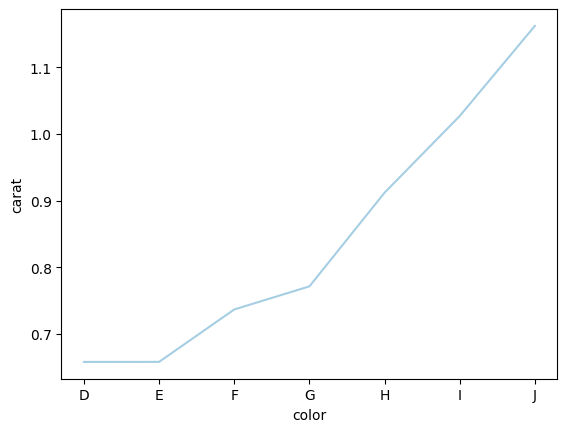

In [19]:
sns.set_palette(sns.color_palette("Paired"))
sns.lineplot(data = diamonds_df_carat)
plt.show()

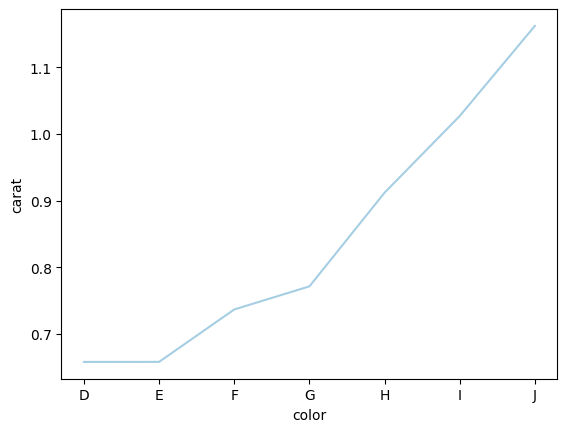

In [20]:
sns.set_palette(sns.color_palette("Paired"))
sns.lineplot(data = diamonds_df_carat)
plt.show()

In [21]:
########### annotation 이용 그래프 1-3과 이어짐 #################
diamonds_df_cut.count()
df_23 = diamonds_df_cut.count()


In [22]:
df_23 = df_23[['y']]
df_23.colums = 'count'
df_23
# sns.countplot(data = diamonds_df_cut.count(), palette='Set1', x = diamonds_df_cut.count().index)

,y
color,
D,1603
E,2337
F,2331
G,2924
H,2360
I,1428
J,808


Text(6, 800, '808')

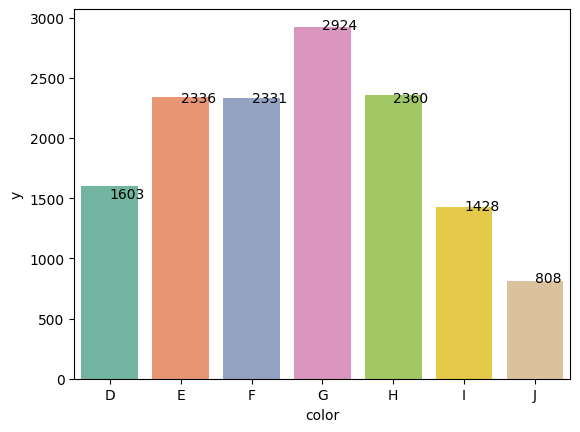

In [23]:
fig,ax=plt.subplots()
############ annotation 사용 ##########
chart = sns.barplot(x = df_23.index, y='y', data = df_23, palette='Set2')
ax.text(0,1500,'1603')
ax.text(1,2300,'2336')
ax.text(2,2300,'2331')
ax.text(3,2900,'2924')
ax.text(4,2300,'2360')
ax.text(5,1400,'1428')
ax.text(6,800,'808')

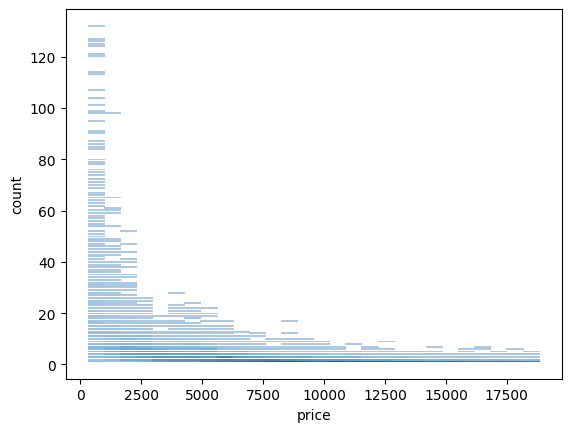

In [24]:
########### 위의 1-4번 그래프와 같다.
sns.set_palette(sns.color_palette("Blues"))
sns.histplot(data=df_price_group.count(),x = df_price_group.count().index, y = 'count')


## 3. 다른 사람이 제출한 2번 과제를 참조하여 해당 차트의 의미를 설명하는 글을 작성하세요. 

- 해당 차트를 설명하기 위해서, 코드 혹은 차트 결과물 그리고 원 데이터 셋에 대한 간단한 description을 작성해야합니다.

1. x 축은 시간의 흐름(분기?)을 나타내고 y 축은 인구수를 나타낸다.
2. 각각의 줄은 해당하는 연령대를 나타낸다.
3. 결과 : 10, 11, 12 이렇게 분기별로 연령대의 코로나 확진자 수 를 알 수 있다.
4. 65세 이상의 코로나 확진자 수가 11월부터 급격하게 높아진다.
5. 65세 이상의 코로나 확진자 수가 가장 많고 그 다음 50세 이상, 18세~49세 , 0-4세, 5-18세 순으로 적어진다.

## 🔥 도전과제

plotly를 이용하여, 위의 내용과 동일하게 interactive한 시각화를 작성하세요.

In [25]:
!pip install plotly
!pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.1)


In [26]:
import plotly.offline as pyo
import plotly.graph_objs as go

In [41]:
df_all = df_price_group.count()
df_all = df_all.reset_index()
df_all

,price,count
0,326,2
1,327,1
2,334,1
3,335,1
4,336,2
...,...,...
11597,18803,1
11598,18804,1
11599,18806,1
11600,18818,1


In [46]:
bar_chart = go.Bar(x=df_all['price'], y=df_all['count'])
data = bar_chart

# fig = go.Figure(data=data)
# pyo.iplot(fig)
fig = go.Figure(data=data)
pyo.iplot(fig)

covid_group